In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

sns.set_palette("pastel")

In [2]:
df = pd.read_csv("data_tms.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df["Age"] = df["Age"].fillna(df["Age"].median())

bins = [0, 16, 60, 120]
labels = ["child", "adult", "senior"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

df.drop(columns=["Age"], axis=1, inplace=True)

df["AgeGroup"].value_counts()

AgeGroup
adult     782
child      83
senior     26
Name: count, dtype: int64

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,adult
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,adult
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,adult


Разберёмся с каютами.

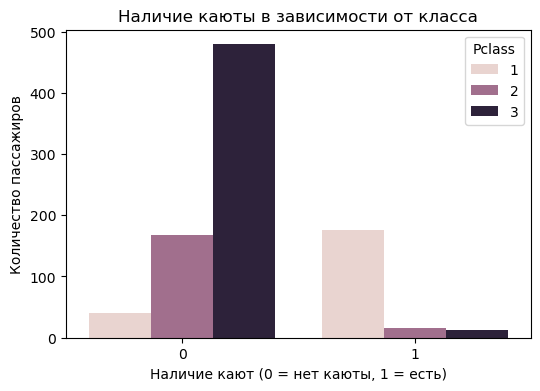

In [7]:
df["HasCabin"] = df["Cabin"].notna().astype(int)

plt.figure(figsize=(6,4))
sns.countplot(x="HasCabin", hue="Pclass", data=df)
plt.title("Наличие каюты в зависимости от класса")
plt.xlabel("Наличие кают (0 = нет каюты, 1 = есть)")
plt.ylabel("Количество пассажиров")
plt.show()

In [8]:
df[["HasCabin", "Pclass"]].corr()

,HasCabin,Pclass
HasCabin,1.000000,-0.725541
Pclass,-0.725541,1.000000


По таблице корреляций видно, что HasCabin и Pclass сильно связаны. А значит, можем из датасета убрать HasCabin и Cabin.

In [9]:
df.drop(columns=["HasCabin", "Cabin"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Embarked     889 non-null    object  
 10  AgeGroup     891 non-null    category
dtypes: category(1), float64(1), int64(5), object(4)
memory usage: 70.7+ KB


In [10]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

df.drop(["Name", "SibSp", "Parch"], axis=1, inplace=True)

In [11]:
df["FamilySize"].value_counts().sort_index()

FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64

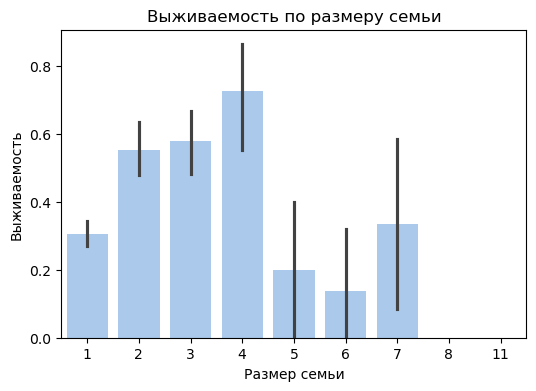

In [12]:
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data=df, x="FamilySize", y="Survived", ax=ax)
ax.set_title("Выживаемость по размеру семьи")
ax.set_xlabel("Размер семьи")
ax.set_ylabel("Выживаемость")
plt.show()

In [13]:
df.drop(columns=["PassengerId", "Ticket", "Embarked"], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Fare,AgeGroup,FamilySize
0,0,3,male,7.2500,adult,2
1,1,1,female,71.2833,adult,2
2,1,3,female,7.9250,adult,1
3,1,1,female,53.1000,adult,2
4,0,3,male,8.0500,adult,1
...,...,...,...,...,...,...
886,0,2,male,13.0000,adult,1
887,1,1,female,30.0000,adult,1
888,0,3,female,23.4500,adult,4
889,1,1,male,30.0000,adult,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    object  
 3   Fare        891 non-null    float64 
 4   AgeGroup    891 non-null    category
 5   FamilySize  891 non-null    int64   
dtypes: category(1), float64(1), int64(3), object(1)
memory usage: 35.9+ KB


In [33]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [34]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_features

Index(['Pclass', 'Fare', 'FamilySize'], dtype='object')

In [35]:
categorical_features = X.select_dtypes(include=['object', 'category']).columns
categorical_features

Index(['Sex', 'AgeGroup'], dtype='object')

In [36]:
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ]), categorical_features)
])

In [37]:
X_norm = preprocessor.fit_transform(X)

In [88]:
X_norm

array([[ 0.82737724, -0.50244517,  0.05915988,  1.        ,  0.        ,
         0.        ],
       [-1.56610693,  0.78684529,  0.05915988,  0.        ,  0.        ,
         0.        ],
       [ 0.82737724, -0.48885426, -0.56097483,  0.        ,  0.        ,
         0.        ],
       ...,
       [ 0.82737724, -0.17626324,  1.29942929,  0.        ,  0.        ,
         0.        ],
       [-1.56610693, -0.04438104, -0.56097483,  1.        ,  0.        ,
         0.        ],
       [ 0.82737724, -0.49237783, -0.56097483,  1.        ,  0.        ,
         0.        ]])

In [38]:
features_name = preprocessor.get_feature_names_out()
features_name

array(['num__Pclass', 'num__Fare', 'num__FamilySize', 'cat__Sex_male',
       'cat__AgeGroup_child', 'cat__AgeGroup_senior'], dtype=object)

In [39]:
from sklearn.cluster import KMeans

D:\Python\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\Python\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\Python\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\Python\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memor

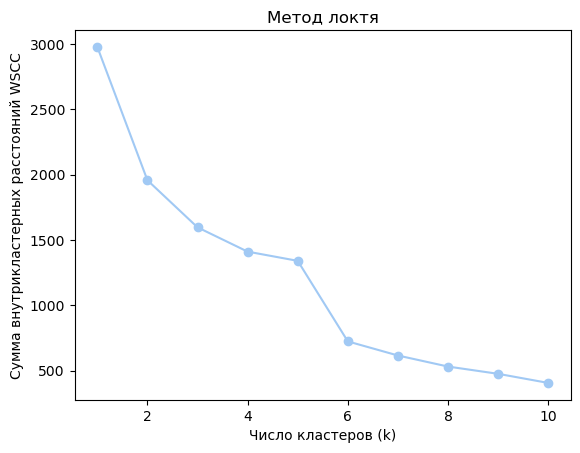

In [40]:
K_range = range(1, 11)
inertias = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_norm)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.title("Метод локтя")
plt.xlabel("Число кластеров (k)")
plt.ylabel("Сумма внутрикластерных расстояний WSCC")
plt.show()

In [57]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_norm)
kmeans_pred_res = kmeans.predict(X_norm)

D:\Python\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [58]:
labels = kmeans.labels_ # Массив меток кластеров
centroids = kmeans.cluster_centers_ # Центры кластеров

In [59]:
labels

array([5, 4, 5, 4, 5, 5, 1, 0, 5, 2, 5, 1, 5, 0, 5, 2, 0, 2, 5, 5, 2, 2,
       5, 1, 0, 0, 5, 3, 5, 5, 1, 4, 5, 2, 4, 1, 5, 5, 5, 5, 5, 2, 5, 2,
       5, 5, 5, 5, 5, 5, 0, 5, 4, 2, 1, 1, 2, 5, 2, 0, 5, 4, 4, 0, 1, 5,
       2, 5, 0, 5, 2, 0, 2, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 1, 2, 0, 0, 5,
       3, 5, 5, 5, 1, 5, 5, 5, 1, 1, 2, 2, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5,
       1, 5, 5, 5, 5, 5, 5, 2, 3, 0, 2, 5, 2, 2, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 2, 2, 2, 1, 1, 5, 1, 5, 5, 5, 5, 2, 2, 5, 0, 2, 2, 2, 4, 5, 5,
       5, 1, 5, 5, 5, 0, 5, 2, 5, 5, 0, 5, 4, 0, 1, 5, 1, 0, 5, 5, 1, 5,
       0, 1, 2, 5, 0, 2, 0, 2, 5, 1, 5, 1, 5, 5, 2, 2, 5, 2, 1, 4, 5, 5,
       5, 2, 5, 0, 5, 5, 5, 5, 5, 5, 5, 1, 5, 2, 5, 2, 5, 4, 5, 2, 4, 2,
       5, 2, 5, 5, 4, 5, 2, 5, 2, 0, 4, 5, 2, 0, 2, 5, 2, 2, 2, 2, 5, 5,
       2, 5, 5, 4, 5, 2, 1, 2, 5, 5, 1, 5, 5, 5, 4, 4, 3, 2, 5, 0, 4, 1,
       5, 2, 0, 5, 4, 4, 1, 5, 2, 1, 5, 4, 5, 2, 0, 5, 5, 5, 5, 5, 1, 5,
       5, 5, 2, 5, 4, 4, 2, 5, 5, 1, 5, 4, 1, 3, 5,

In [60]:
centroids

array([[ 7.89385432e-01,  4.64248033e-02,  2.85468776e+00,
         4.44444444e-01,  5.07936508e-01,  6.93889390e-18],
       [-1.56610693e+00,  7.67875958e-02, -4.19756036e-01,
         8.81188119e-01,  0.00000000e+00,  1.08910891e-01],
       [-3.69364841e-01, -2.42361871e-01, -1.16544957e-01,
         6.00000000e-01,  1.05555556e-01,  2.22222222e-02],
       [-1.56610693e+00,  4.97536853e+00,  5.55267642e-01,
         4.00000000e-01,  5.00000000e-02,  5.00000000e-02],
       [-1.54143183e+00,  1.23706377e+00,  1.67843279e-01,
         2.57731959e-01,  5.15463918e-02,  5.15463918e-02],
       [ 8.27377244e-01, -4.33855184e-01, -3.34553554e-01,
         7.41860465e-01,  6.04651163e-02,  1.16279070e-02]])

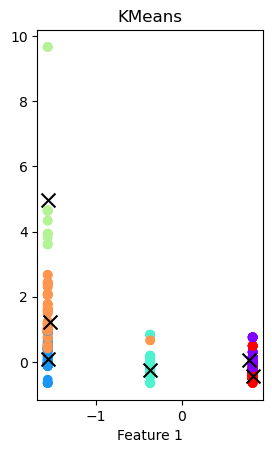

In [66]:
plt.subplot(1, 2, 2)
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=labels, cmap="rainbow")
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color="black", s=100)
plt.title("KMeans")
plt.xlabel("Feature 1")

plt.show()

In [67]:
from sklearn.cluster import DBSCAN

In [90]:
dbscan = DBSCAN(eps=0.7, min_samples=6)

dbscan.fit(X_norm)

DBSCAN(eps=0.7, min_samples=6)

In [73]:
labels = dbscan.labels_
labels

array([ 0,  1,  2,  1,  0,  0,  3,  4,  2,  5,  6,  1,  0, -1,  6,  7,  4,
        8,  2,  2,  8,  8,  6,  3,  6,  2,  0, -1,  2,  0,  3,  1,  2, -1,
        3,  3,  0,  0,  2,  6,  2,  7,  0,  5,  2,  0,  0,  2,  0,  2,  4,
        0,  1,  7, 10,  3,  7,  0,  5,  4,  0,  1,  3,  4,  3,  0,  7,  0,
        2,  0,  8,  2, -1,  0,  0,  0,  0,  0,  9,  2,  0,  0,  2,  3,  7,
        2,  0,  0, -1,  0,  0,  0,  3,  0,  0,  0, 10,  3,  7,  8,  2,  0,
        3,  0,  0,  0,  2,  0,  0,  2,  3,  6,  0,  2,  2,  0, -1,  8, -1,
        6, -1,  0,  8,  7,  3,  4,  0,  0,  2,  0,  0,  0,  2,  7,  8,  8,
        1,  3,  0,  3,  2,  2,  2,  0,  8,  8,  0,  6,  8,  8,  8,  1,  0,
        0,  0,  3,  2,  0,  0, -1,  0,  7,  0,  0,  4,  4,  1,  2,  3,  0,
       10,  4,  6,  0,  3,  0,  0,  1,  8,  0, -1,  8,  4,  9,  6,  3,  2,
        3,  0,  0,  7,  8,  2,  9,  1,  1,  0,  0,  2,  7,  0, -1,  0,  0,
        0,  6,  0,  0,  2,  3,  0,  7,  0,  8,  0,  1,  2,  8,  1,  8,  0,
        8,  0,  0,  3,  0

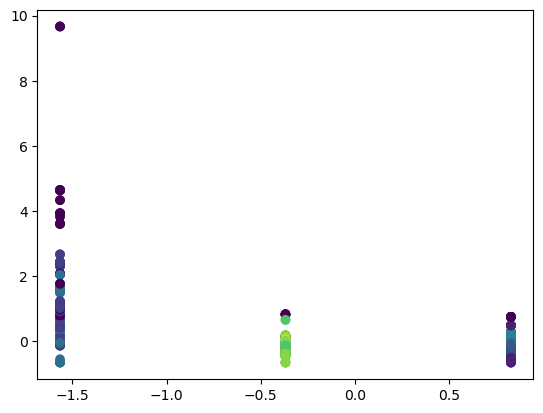

In [87]:
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=labels, cmap='viridis')
plt.show()

In [80]:
from sklearn.decomposition import PCA

In [81]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

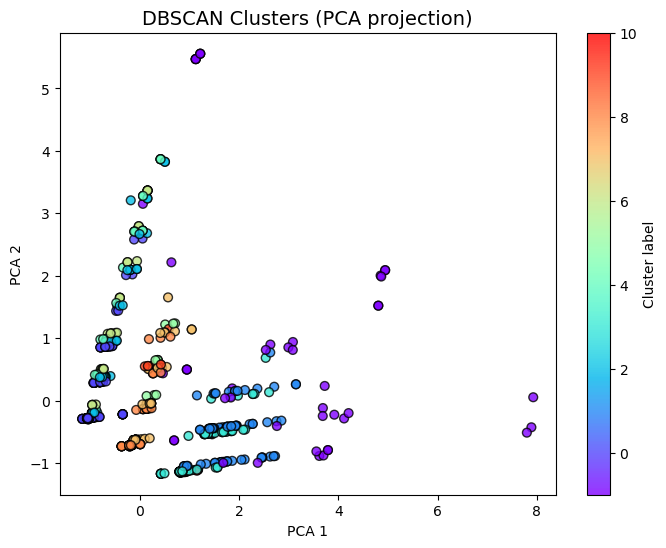

In [83]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels,
    cmap='rainbow',
    s=40,
    alpha=0.8,
    edgecolor='k'
)

plt.title('DBSCAN Clusters (PCA projection)', fontsize=14)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster label')
plt.show()

In [93]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

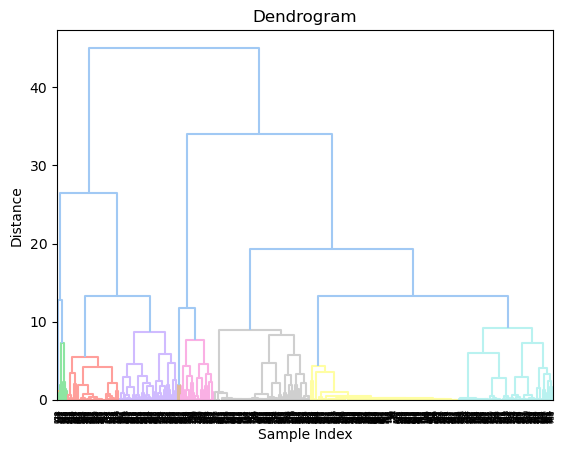

In [101]:
linkage_matrix = linkage(X_norm, method='ward', metric='euclidean')

dendrogram(linkage_matrix, color_threshold=10, p=6)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

In [108]:
sk_ac = AgglomerativeClustering(n_clusters=6, linkage='ward')
labels = sk_ac.fit_predict(X_norm)

In [109]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([196,  20,  66, 169, 173, 267]))

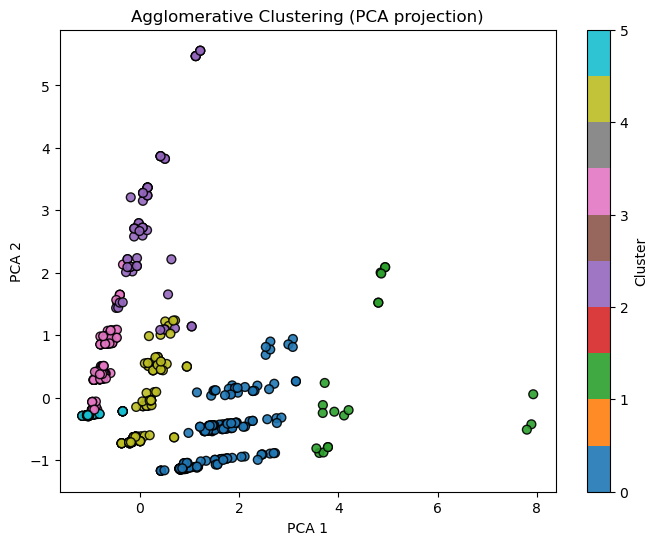

In [110]:
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_norm)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', s=40, alpha=0.9, edgecolor='k')
plt.title('Agglomerative Clustering (PCA projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()